In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
glcm_0_df = pd.read_csv('glcm_0.csv', sep='\t').sample(frac=1)
glcm_45_df = pd.read_csv('glcm_45.csv', sep='\t').sample(frac=1)
glcm_90_df = pd.read_csv('glcm_90.csv', sep='\t').sample(frac=1)
glcm_135_df = pd.read_csv('glcm_135.csv', sep='\t').sample(frac=1)
glcm_complex_df = pd.read_csv('glcm_complex.csv', sep='\t').sample(frac=1)
glcm_complex_duplex_df = pd.read_csv('glcm_complex_duplex.csv', sep='\t').sample(frac=1)

all_datasets = [glcm_0_df, glcm_45_df, glcm_45_df, glcm_135_df, glcm_complex_df, glcm_complex_duplex_df]
df_names = ['glcm_0_df', 'glcm_45_df', 'glcm_45_df', 'glcm_135_df', 'glcm_complex_df', 'glcm_complex_duplex_df']
glcm_complex_duplex_df.head()

,name,energy,contrast,homogenity,correlation,variance,entropy,pathology
21,patho_15.bmp,0.001034,58.904500,0.165480,0.000274,3614.137321,7.200173,1
6,patho_23.bmp,0.002491,19.297490,0.271946,0.001215,812.974736,6.469514,1
45,norma_11.bmp,0.000730,72.637927,0.159730,0.000121,8225.129756,7.546994,0
44,norma_10.bmp,0.001913,46.523319,0.181669,0.000132,7577.096977,6.548294,0
18,patho_12.bmp,0.000942,57.487816,0.165318,0.000276,3596.290146,7.323378,1


In [17]:
glrlm_0 = pd.read_csv('./datasets/GLRLM_Features.csv', sep=',', index_col=0).sample(frac=1)
features = ['LGRE', 'HGRE', 'GLNU']
target = 'isPatho'
print(glrlm_0)

        LGRE           HGRE          GLNU  isPatho
92  0.011952  510244.582278   9130.392405        0
94  0.011952  510244.582278   9130.392405        0
4   0.011952  510244.582278   9130.392405        0
90  0.011952  510244.582278   9130.392405        0
82  0.011952  510244.582278   9130.392405        0
76  0.011952  510244.582278   9130.392405        0
28  0.011952  510244.582278   9130.392405        0
33  0.044628  489944.305556  12438.263889        1
0   0.011952  510244.582278   9130.392405        0
19  0.044628  489944.305556  12438.263889        1
62  0.011952  510244.582278   9130.392405        0
78  0.011952  510244.582278   9130.392405        0
31  0.044628  489944.305556  12438.263889        1
42  0.011952  510244.582278   9130.392405        0
1   0.044628  489944.305556  12438.263889        1
47  0.044628  489944.305556  12438.263889        1
53  0.044628  489944.305556  12438.263889        1
77  0.044628  489944.305556  12438.263889        1
64  0.011952  510244.582278   9

LinAlgError: singular matrix

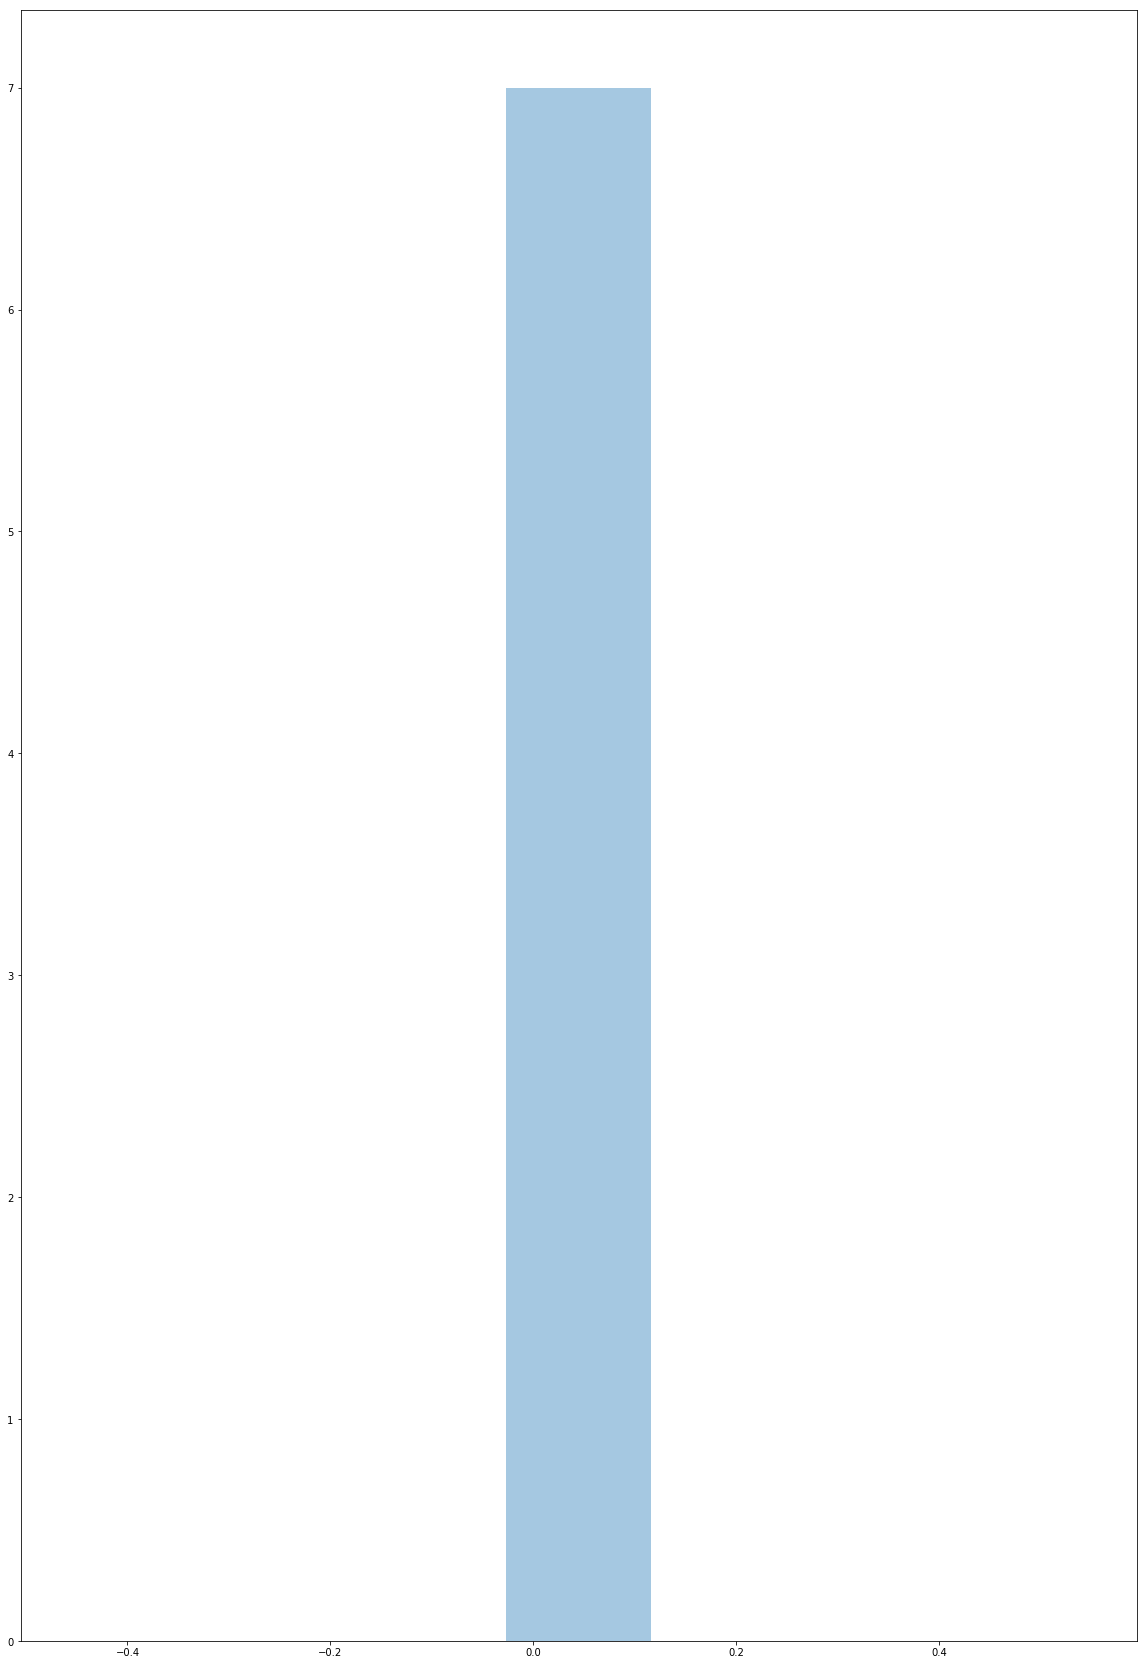

In [18]:
p = glrlm_0[glrlm_0['isPatho'] == 1]
n = glrlm_0[glrlm_0['isPatho'] == 0]

sns.distplot(p['LGRE'], norm_hist=True, kde_kws={'linewidth': 3})
sns.distplot(n['LGRE'], norm_hist=True, kde_kws={'linewidth': 3})

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


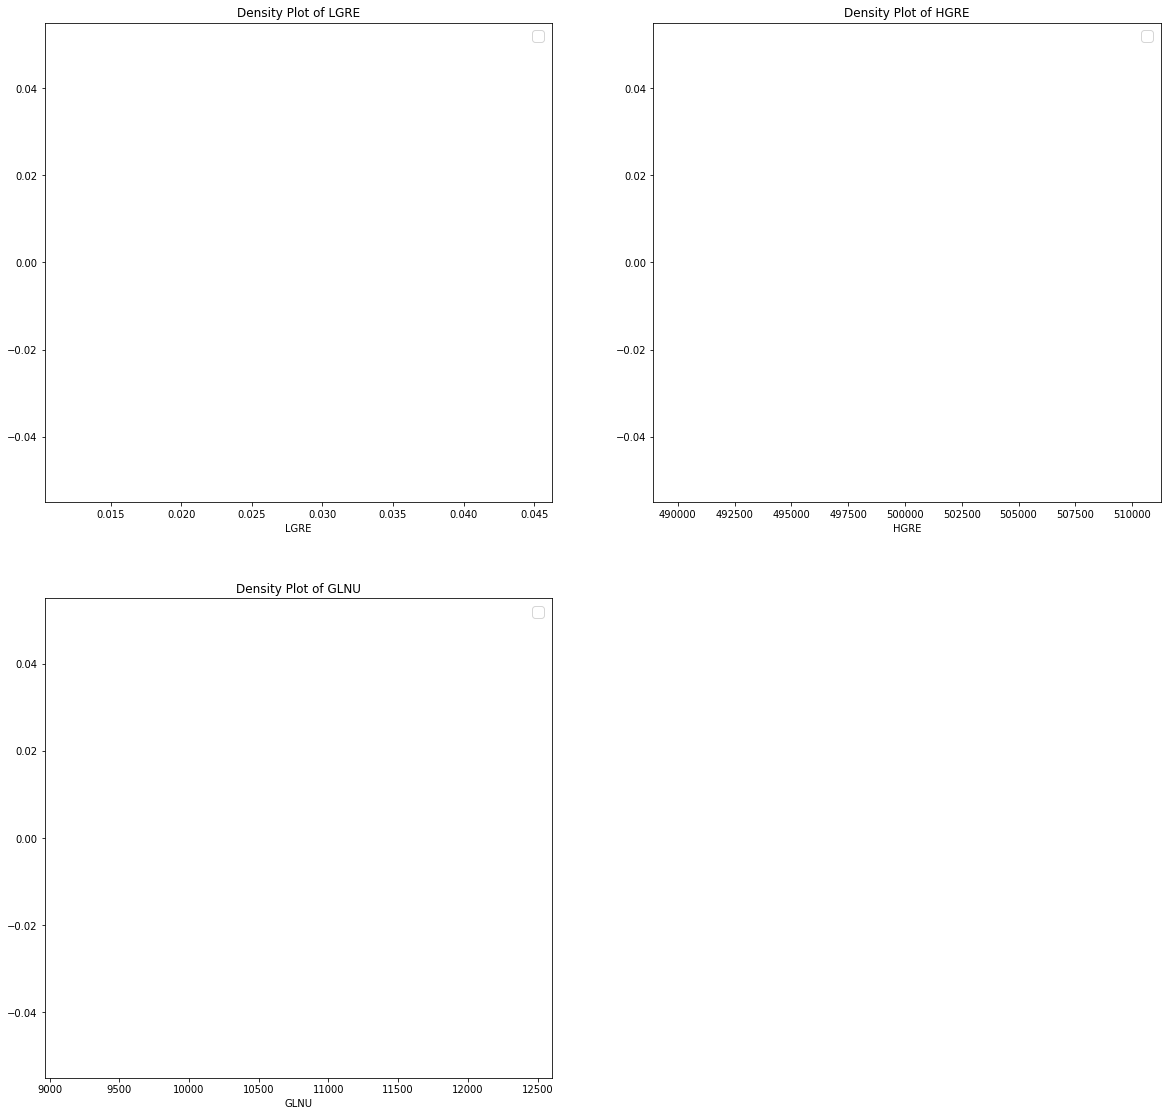

In [9]:
density_plot(glrlm_0, features, target)

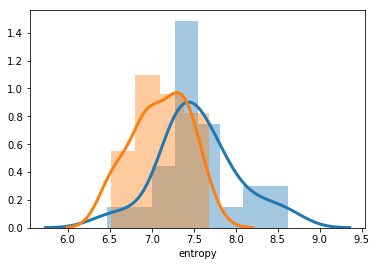

In [22]:
patho = glcm_complex_duplex_df[glcm_complex_duplex_df['pathology'] == 1]
norma = glcm_complex_duplex_df[glcm_complex_duplex_df['pathology'] == 0]
sns.distplot(patho['entropy'], kde=True, kde_kws={'linewidth': 3})
sns.distplot(norma['entropy'], kde=True, kde_kws={'linewidth': 3})

In [8]:
def visualize_pairplot(df):
    no_name_df = df[1:]
    sns.pairplot(
        no_name_df,
        kind='reg',
        hue='pathology',
        plot_kws={
            'line_kws':{'color':'red'},
                'scatter_kws': {'alpha': 0.1}
        },
        diag_kind='hist')

In [8]:
def density_plot(df, features, target):
    plt.rcParams["figure.figsize"] = (20, 30)
#     features = ['energy', 'contrast', 'homogenity', 'correlation', 'variance', 'entropy']
#     if feature not in features:
#         print("Wrong feature")
#         print("Choose from: ", features)

    patho = df[df[target] == 1]
    norma = df[df[target] == 0]
    
    for (i, f) in enumerate(features):
        plt.subplot(3, 2, i + 1)
        sns.distplot(patho[f], hist=False, kde=False, kde_kws={'shade': True, 'linewidth': 3}, label='pathology')
        sns.distplot(norma[f], hist=False, kde=False, kde_kws={'shade': True, 'linewidth': 3}, label='norma')
        plt.title('Density Plot of ' + f)
        plt.legend(prop={'size': 15})
        
    plt.show()

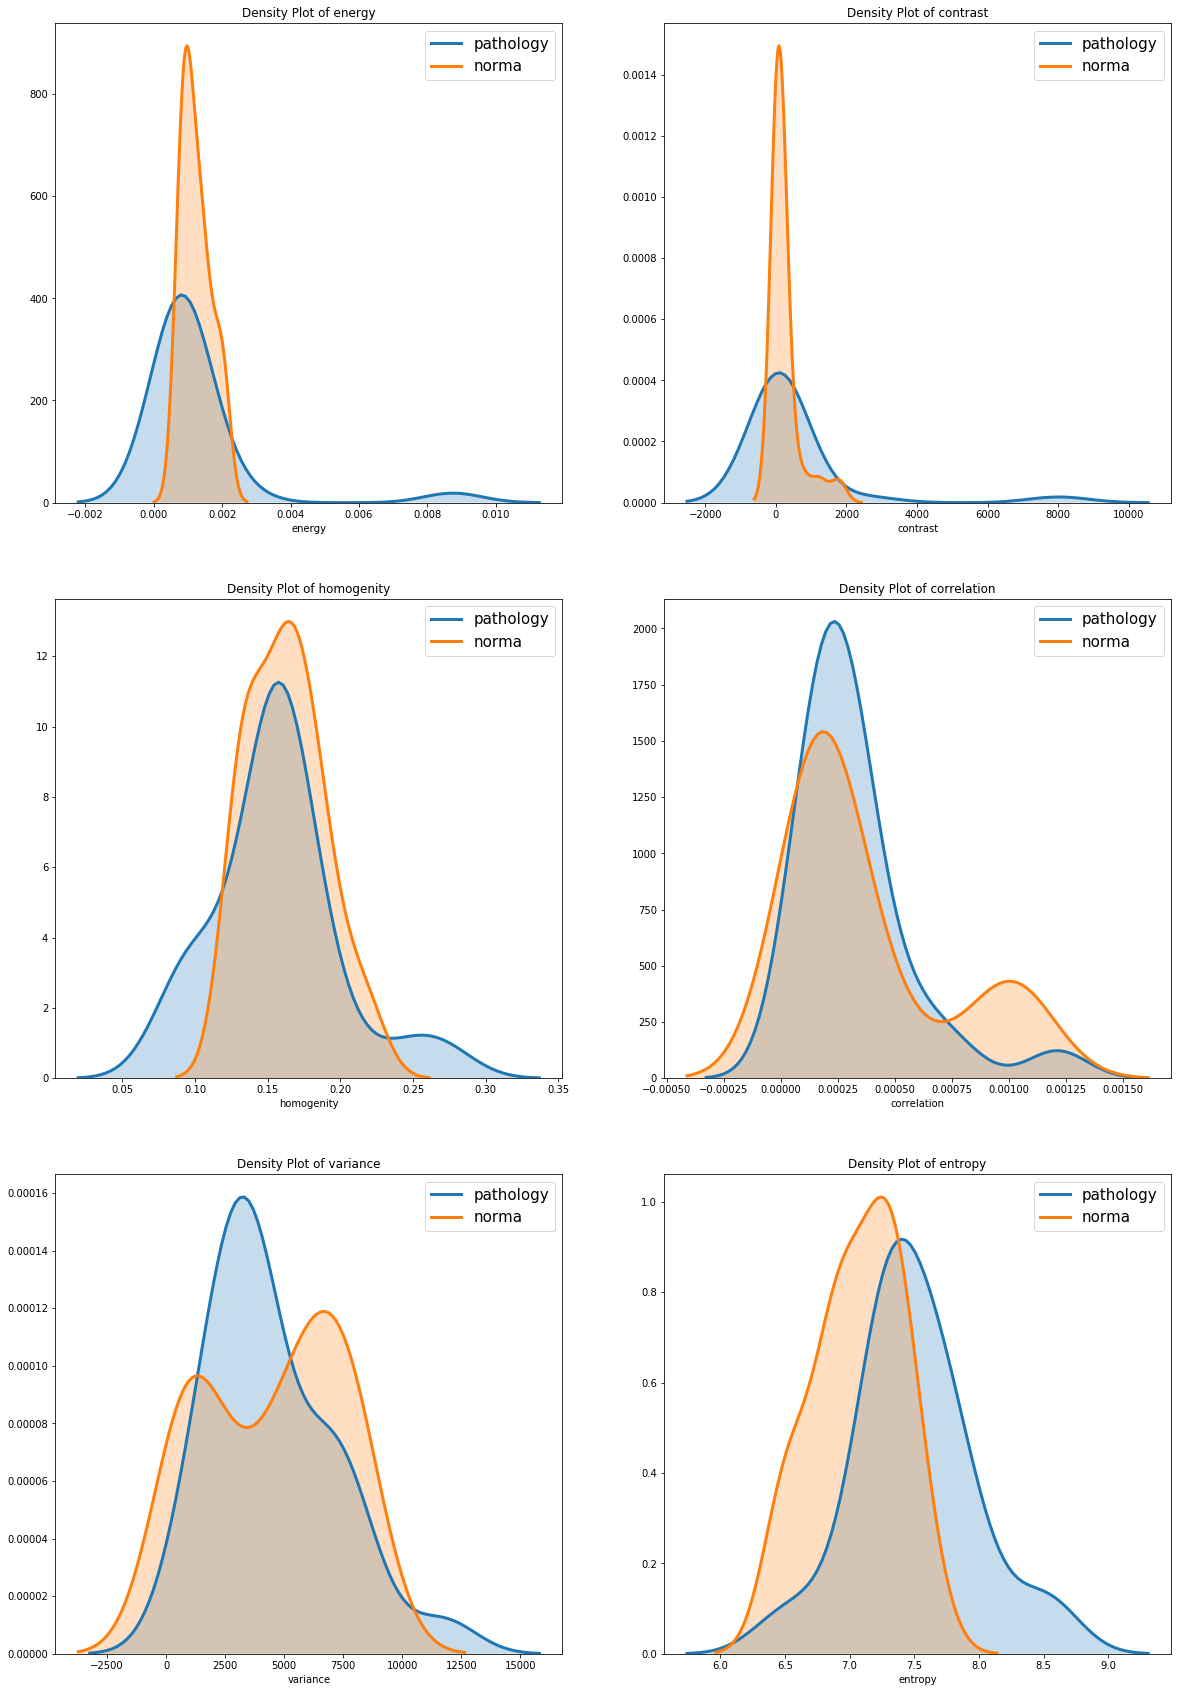

In [62]:
density_plot(glcm_complex_df)

In [34]:
glrlm_0 = pd.read_csv('./datasets/glrlm_0.csv', sep=',', index_col=0).sample(frac=1)
print(glrlm_0.head())
features = ['LGRE', 'HGRE', 'GLNU']

target = 'isPatho'

        LGRE           HGRE          GLNU  isPatho
64  0.009373  171512.069307   2595.633663      0.0
22  0.044628  489944.305556  12438.263889      1.0
4   0.019768  374751.235294   7092.176471      1.0
46  0.143106  144779.193772  53002.702422      1.0
56  0.280428   40767.912281  11423.070175      0.0


In [35]:
p = glrlm_0[glrlm_0['isPatho'] == 1]
n = glrlm_0[glrlm_0['isPatho'] == 0]

In [37]:
sns.distplot(p.loc[['LGRE']])

KeyError: "None of [Index(['LGRE'], dtype='object')] are in the [index]"

In [50]:
glrlm_0.groupby('isPatho')[features].agg([np.mean, np.std])

LGRE                     HGRE                         GLNU  \
             mean       std           mean            std          mean   
isPatho                                                                   
0.0      0.220833  0.413473  188395.534634  181493.186002   9820.548001   
1.0      0.032267  0.042557  379772.090821  236849.726517  18058.985009   

                       
                  std  
isPatho                
0.0       8208.874471  
1.0      35452.219354

In [49]:
import pprint

print("Norma")
print("Mean: ")
pprint.pprint(dict(zip(features, n.loc[:, features].mean().values)))
print("\nDeviation: ")
pprint.pprint(dict(zip(features, n.loc[:, features].std().values)))

print("\nPatho")
print("Mean: ")
pprint.pprint(dict(zip(features, p.loc[:, features].mean().values)))
print("\nDeviation: ")
pprint.pprint(dict(zip(features, p.loc[:, features].std().values)))

Norma
Mean: 
{'GLNU': 9820.548001320241,
 'HGRE': 188395.53463425642,
 'LGRE': 0.22083333144617068}

Deviation: 
{'GLNU': 8208.874470722882,
 'HGRE': 181493.18600202532,
 'LGRE': 0.41347286713555914}

Patho
Mean: 
{'GLNU': 18058.985009294796,
 'HGRE': 379772.0908214286,
 'LGRE': 0.03226695545491248}

Deviation: 
{'GLNU': 35452.219353624685,
 'HGRE': 236849.72651672058,
 'LGRE': 0.04255685340033707}


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


def get_data(df, features):
#     no_name = df.loc[:, df.columns != 'name']
#     no_name = no_name.loc[:, features]
    print(df.head())
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    
#     print(y)
    patho = df.loc[y == 1]
    norma = df.loc[y == 1]
    
    X_train = X[:int(len(X)/2)]
    X_test = X[int(len(X)/2):]
    
    y_train = y[:int(len(y)/2)]
    y_test = y[int(len(y)/2):]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_data(glrlm_0, features)

# print(glrlm_0)
# model = LogisticRegression()
# polynomial_features = PolynomialFeatures(degree=2)

# x_poly = polynomial_features.fit_transform(X_train)

def logistic_regression(df, features):
    X_train, X_test, y_train, y_test = get_data(df, features)
    
#     print(y_test)
    model = LogisticRegression(
        random_state=0,
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=200
    )
    
    model.fit(X_train, y_train)
    predicted_classes = model.predict(X_test)
    accuracy = accuracy_score(y_test, predicted_classes)
    return accuracy

acc = logistic_regression(glrlm_0, features)
print('Accuracy: ', int(acc * 100), '%')

        LGRE           HGRE          GLNU  isPatho
64  0.009373  171512.069307   2595.633663      0.0
22  0.044628  489944.305556  12438.263889      1.0
4   0.019768  374751.235294   7092.176471      1.0
46  0.143106  144779.193772  53002.702422      1.0
56  0.280428   40767.912281  11423.070175      0.0
        LGRE           HGRE          GLNU  isPatho
64  0.009373  171512.069307   2595.633663      0.0
22  0.044628  489944.305556  12438.263889      1.0
4   0.019768  374751.235294   7092.176471      1.0
46  0.143106  144779.193772  53002.702422      1.0
56  0.280428   40767.912281  11423.070175      0.0
Accuracy:  76 %


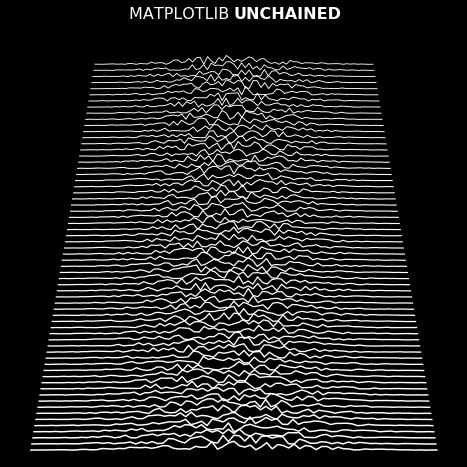

In [ ]:
хех